# Group: Final-Project-30

Akshay Choksi (ajc9yr), Emmanuel Zapata (ez4fp), Sahil Khanna (sk5xvh), Sierra O’Shea (sdo6bt)



**Motivation**: The problem we are addressing is the need to detect the early stages of  Alzheimers’ disease and its continuous monitoring over time if diagnosed.  Since early stages of Alzheimer's often go undetected due to the subtlety of symptoms, treatment is often delayed and poorly managed. Via the improvement of accuracy and timeliness of detection via the use of patients’ handwriting, we can provide a clearer understanding of the disease's current stage in patients, which can help identify the best treatment plan moving forward.


**Import necessary libraries**

In [ ]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
from sklearn.preprocessing import StandardScaler, LabelEncoder

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Upload Dataset and Quick Look** : Make sure to upload data.csv locally

In [ ]:
writing = pd.read_csv('data.csv')
# Check for categorical data
categorical_data = writing.select_dtypes(include=['object']).shape[1] > 0
if categorical_data:
    res = "Yes"
else:
    res = "No"

# Check for missing values
missing_values = writing.isnull().sum().sum() > 0
if missing_values:
    ret = "Yes"
else:
    ret = "No"

#things to learn from dataset
basic_stats = writing.describe()

print(f"Number of entries: {len(writing)}")
print(f"Number of features: {writing.shape[1]}")
print(f"Contains categorical data: {res}")
print(f"Contains missing values: {ret}")
print("\nBasic Statistics:\n", basic_stats)


Number of entries: 174
Number of features: 452
Contains categorical data: Yes
Contains missing values: No

Basic Statistics:
            air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count     174.000000   174.000000    174.000000      174.000000   
mean     5664.166667     0.000010    297.666685      200.504413   
std     12653.772746     0.000003    183.943181      111.629546   
min        65.000000     0.000002     28.734515       29.935835   
25%      1697.500000     0.000008    174.153023      136.524742   
50%      2890.000000     0.000009    255.791452      176.494494   
75%      4931.250000     0.000011    358.917885      234.052560   
max    109965.000000     0.000028   1168.328276      865.210522   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count        174.000000        174.000000        174.000000   
mean        1977.965517       7323.896552          0.416374   
std         1648.306365       2188.290512          0.381837   
min          754.0

**Data Preprocessing**

In [ ]:
writing.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [ ]:
missing_values = writing.isnull().sum().sum()
print(missing_values)

0


**Scale and Encode**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


scaler = StandardScaler()

# Extract features and target
features = writing.drop(columns=['ID', 'class'])
target = writing['class']

# Scale the features
scaled_features = scaler.fit_transform(features)

# Encode the class labels
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(target)

# Show transformed features and target
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
encoded_target_df = pd.Series(encoded_target)

scaled_features_df.head(), encoded_target_df.head()

(   air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
 0  -0.039958     0.819201     -0.964281       -1.021048         -0.621190   
 1   3.670803     1.863195     -0.994191       -1.051635         -0.172774   
 2  -0.242853     0.162976     -0.369289       -0.249241          0.216015   
 3  -0.280104     0.162976      0.391119       -0.155526         -0.135051   
 4  -0.265837    -0.863121     -0.216284       -0.801634         -0.602937   
 
    max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
 0         -0.331301         -0.143336            0.583446   -1.097797   
 1         -0.149357         -0.377846           -0.541698   -1.131393   
 2         -0.697480         -0.077097            0.023550   -0.360783   
 3          0.382725          0.369034           -0.237507    0.205663   
 4         -1.187857         -0.394751           -0.538220   -0.487082   
 
    mean_jerk_in_air1  ...  mean_gmrt25  mean_jerk_in_air25  \
 0          -0.210827

**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, encoded_target_df, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139, 450), (35, 450), (139,), (35,))

**Experiment Fit**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the SVM classifier - use rbf for nonlinear data
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mat = confusion_matrix(y_test, y_pred)
accuracy, precision, recall, f1


print("Confidence matrix: ")
print(mat)
print("Recall: ", recall)
print("Precision: ", precision)
print("f1 score: ", f1)
print("accuracy: ", accuracy)

Confidence matrix: 
[[13  2]
 [ 3 17]]
Recall:  0.85
Precision:  0.8947368421052632
f1 score:  0.8717948717948718
accuracy:  0.8571428571428571


*Need to improve accuracy and precision*

# **Grid Search to Find Best Hyperparameters**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#setup for each kernel check
kernels = ['linear', 'poly', 'rbf']
param_grids = {
    'linear': [{'C': [0.1, 0.5, 1, 10]}],
    'poly': [{'C': [0.1, 0.5, 1, 10], 'degree': [2, 3, 4], 'coef0': [1]}],
    'rbf': [{'C': [0.1, 0.5, 1, 10], 'gamma': [0.1, 0.5, 1]}]
}

best_params_list = {}

for kernel in kernels:
    grid_search = GridSearchCV(SVC(), param_grids[kernel], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params_list[kernel] = grid_search.best_params_
    print(f"Best hyperparameters for {kernel} kernel:", grid_search.best_params_)


param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'coef0': [0, 1, 2]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1]}
]

# Perform grid search
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_
print("best parameters: ", best_params)



Best hyperparameters for linear kernel: {'C': 1}
Best hyperparameters for poly kernel: {'C': 1, 'coef0': 1, 'degree': 2}
Best hyperparameters for rbf kernel: {'C': 0.1, 'gamma': 0.1}
best parameters:  {'C': 0.1, 'coef0': 2, 'degree': 4, 'kernel': 'poly'}


In [ ]:
# Evaluate the best SVM model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Compute
mat = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best SVM: ", best_svm)
print("Confidence matrix: ")
print(mat)
print("Recall: ", recall)
print("Precision: ", precision)
print("accuracy: ", accuracy)
print("f1 score: ", f1)

Best SVM:  SVC(C=0.1, coef0=2, degree=4, kernel='poly')
Confidence matrix: 
[[14  1]
 [ 3 17]]
Recall:  0.85
Precision:  0.9444444444444444
accuracy:  0.8857142857142857
f1 score:  0.8947368421052632


### Part 2 - Attempt to improve on the classification scores through feature engineering

In [ ]:
# Loading the uploaded data to perform initial analysis and feature engineering.
data_df = pd.read_csv('data.csv')
data_df.head(), data_df.info(), data_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


(     ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
 0  id_1       5160     0.000013    120.804174       86.853334   
 1  id_2      51980     0.000016    115.318238       83.448681   
 2  id_3       2600     0.000010    229.933997      172.761858   
 3  id_4       2130     0.000010    369.403342      183.193104   
 4  id_5       2310     0.000007    257.997131      111.275889   
 
    max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
 0               957              6601          0.361800            0.217459   
 1              1694              6998          0.272513            0.144880   
 2              2333              5802          0.387020            0.181342   
 3              1756              8159          0.556879            0.164502   
 4               987              4732          0.266077            0.145104   
 
    mean_gmrt1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
 0  103.828754  ...            0.141434              0.

In [ ]:


# Step 1: Feature Aggregation
# Assuming the features related to each task are sequentially numbered in the dataset
aggregated_features = pd.DataFrame()
tasks = 25  # Number of tasks

# Extracting features for each task and calculating statistical summaries
for i in range(1, tasks + 1):
    task_features = [col for col in data_df.columns if f"{i}" in col and 'task' not in col]
    aggregated_features[f'mean_task{i}'] = data_df[task_features].mean(axis=1)
    aggregated_features[f'std_task{i}'] = data_df[task_features].std(axis=1)
    aggregated_features[f'min_task{i}'] = data_df[task_features].min(axis=1)
    aggregated_features[f'max_task{i}'] = data_df[task_features].max(axis=1)

# Step 2: Feature Normalization
# Standardizing the aggregated features
scaler = StandardScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(aggregated_features),
                                   columns=aggregated_features.columns,
                                   index=aggregated_features.index)

# Adding the class label back for modeling
normalized_features['class'] = data_df['class']
normalized_features.head()


,mean_task1,std_task1,min_task1,max_task1,mean_task2,std_task2,min_task2,max_task2,mean_task3,std_task3,...,max_task23,mean_task24,std_task24,min_task24,max_task24,mean_task25,std_task25,min_task25,max_task25,class
0,-0.060749,-0.178358,-0.161119,-0.196781,0.431292,0.102416,0.189302,-0.048803,1.655767,1.481174,...,1.756555,0.281681,0.536169,-0.600469,0.635448,0.093499,0.067803,-0.540182,0.131816,P
1,0.198083,-0.133705,0.662479,-0.220952,1.128485,0.289939,0.754769,-0.071498,1.545357,1.454947,...,0.952742,0.670873,0.751348,-1.006746,0.823324,0.382944,0.211012,1.560248,0.137038,P
2,-0.338460,-0.278673,-3.659098,-0.286502,-0.117404,-0.059972,-0.320848,0.010455,0.603104,0.703240,...,1.054129,1.399440,1.276111,-0.107132,1.296212,-0.191420,-0.180834,0.132370,-0.180358,P
3,0.049038,-0.138380,0.468147,-0.190012,0.592690,0.132176,0.545792,0.018729,0.874034,0.739185,...,0.877090,1.971396,1.497131,-0.208701,1.343955,0.098327,0.021131,0.328961,-0.003840,P
4,-0.019256,-0.157087,-0.919940,-0.202272,0.182844,0.004002,-1.033829,0.038565,0.545432,0.516487,...,0.987748,2.401217,1.732284,-0.223211,1.458413,-0.191814,-0.167911,-1.264468,-0.151797,P


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Step 1: Correlation Analysis
correlation_matrix = normalized_features.drop('class', axis=1).corr()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Identify columns with correlation greater than 0.95
to_drop = []
for column in upper.columns:
    if any(upper[column] > 0.95):
        to_drop.append(column)

reduced_features = normalized_features.drop(columns=to_drop)

# Step 2: Feature Importance with Random Forest
X = reduced_features.drop('class', axis=1)
y = reduced_features['class'].apply(lambda x: 1 if x == 'P' else 0)

# Initialize and train classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Selecting features based on importance
selector = SelectFromModel(rf_classifier, threshold='median')
selector.fit(X, y)
selected_features = X.columns[(selector.get_support())]
selected_features, feature_importance_df.head(10)


(Index(['mean_task1', 'min_task1', 'mean_task2', 'min_task3', 'mean_task4',
        'min_task6', 'mean_task7', 'min_task7', 'min_task8', 'min_task9',
        'min_task12', 'min_task13', 'min_task14', 'mean_task15', 'std_task15',
        'min_task15', 'mean_task17', 'min_task17', 'min_task18', 'min_task19',
        'min_task20', 'mean_task21', 'mean_task22', 'min_task22', 'min_task23',
        'mean_task24', 'min_task25'],
       dtype='object'),
         Feature  Importance
 48   min_task23    0.074581
 45   min_task22    0.056992
 35   min_task17    0.052142
 41   min_task20    0.050076
 8    mean_task4    0.042894
 2    mean_task2    0.027062
 34  mean_task17    0.026910
 14    min_task7    0.025962
 16    min_task8    0.025072
 13   mean_task7    0.024035)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_selected = X[selected_features]
y = reduced_features['class'].apply(lambda x: 1 if x == 'P' else 0)  # Encoding 'P' as 1 and 'H' as 0

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Model Evaluation
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.88      0.75      0.81        20

    accuracy                           0.80        35
   macro avg       0.80      0.81      0.80        35
weighted avg       0.81      0.80      0.80        35



Not great accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#setup for each kernel check
kernels = ['linear', 'poly', 'rbf']
param_grids = {
    'linear': [{'C': [0.1, 0.5, 1, 10]}],
    'poly': [{'C': [0.1, 0.5, 1, 10], 'degree': [2, 3, 4], 'coef0': [1]}],
    'rbf': [{'C': [0.1, 0.5, 1, 10], 'gamma': [0.1, 0.5, 1]}]
}

best_params_list = {}

for kernel in kernels:
    grid_search = GridSearchCV(SVC(), param_grids[kernel], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params_list[kernel] = grid_search.best_params_
    print(f"Best hyperparameters for {kernel} kernel:", grid_search.best_params_)


param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'coef0': [0, 1, 2]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1]}
]

# grid search
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("best parameters: ", best_params)



Best hyperparameters for linear kernel: {'C': 1}
Best hyperparameters for poly kernel: {'C': 1, 'coef0': 1, 'degree': 2}
Best hyperparameters for rbf kernel: {'C': 10, 'gamma': 0.1}
best parameters:  {'C': 0.1, 'kernel': 'linear'}


In [ ]:
# Evaluate the best SVM model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Compute
mat = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best SVM: ", best_svm)
print("Confidence matrix: ")
print(mat)
print("Recall: ", recall)
print("Precision: ", precision)
print("accuracy: ", accuracy)
print("f1 score: ", f1)

Best SVM:  SVC(C=0.1, kernel='linear')
Confidence matrix: 
[[14  1]
 [ 5 15]]
Recall:  0.75
Precision:  0.9375
accuracy:  0.8285714285714286
f1 score:  0.8333333333333334


Scores decreased, feature selection not helpful

## Training a DNN

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Loading the uploaded data to perform initial analysis and feature engineering.
data = pd.read_csv('data.csv')

label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
X = data.drop(columns=['ID', 'class'])
y = data['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape


((104, 450), (35, 450), (35, 450))

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2%}')


Epoch 1/50
11/11 [==============================] - 1s 27ms/step - loss: 0.8847 - accuracy: 0.5673 - val_loss: 0.5059 - val_accuracy: 0.7429
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4901 - accuracy: 0.7788 - val_loss: 0.3862 - val_accuracy: 0.7714
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.4036 - accuracy: 0.8173 - val_loss: 0.3453 - val_accuracy: 0.8000
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.8654 - val_loss: 0.3176 - val_accuracy: 0.8000
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.3213 - accuracy: 0.8750 - val_loss: 0.3076 - val_accuracy: 0.8286
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.8942 - val_loss: 0.3090 - val_accuracy: 0.8286
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2169 - accuracy: 0.9135 - val_loss: 0.3079 - val_accuracy: 0.8286
Epoch 8/50
11/11 [=

Tuning and Model Changes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

#Preprocessing
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
X = data.drop(columns=['ID', 'class']).values
y = data['class'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid (example grid, adjust according to your needs)
learning_rates = [0.001, 0.01]
batch_sizes = [10, 20]
regularization_factors = [0.01, 0.001]

results = []

# Cross-validation and hyperparameter tuning
for lr in learning_rates:
    for batch_size in batch_sizes:
        for l2_reg in regularization_factors:
            fold_no = 1
            for train, test in kfold.split(X_scaled, y):
                model = Sequential([
                    Dense(128, input_dim=450, activation='relu', kernel_regularizer=l2(l2_reg)),
                    Dropout(0.5),
                    Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
                ])

                # Compile the model
                model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
                history = model.fit(X_scaled[train], y[train], epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_scaled[test], y[test]))

                # Evaluate the model
                scores = model.evaluate(X_scaled[test], y[test], verbose=0)
                print(f'Score for fold {fold_no}, lr: {lr}, batch_size: {batch_size}, l2_reg: {l2_reg}, accuracy of {scores[1]*100:.2f}%')
                results.append((lr, batch_size, l2_reg, fold_no, scores[1]))
                fold_no += 1

# Print best results (example, adjust as necessary)
best_result = max(results, key=lambda x: x[4])
print(f'Best result achieved with lr: {best_result[0]}, batch size: {best_result[1]}, l2_reg: {best_result[2]} - Accuracy: {best_result[4]*100:.2f}%')


Score for fold 1, lr: 0.001, batch_size: 10, l2_reg: 0.01, accuracy of 82.86%
Score for fold 2, lr: 0.001, batch_size: 10, l2_reg: 0.01, accuracy of 77.14%
Score for fold 3, lr: 0.001, batch_size: 10, l2_reg: 0.01, accuracy of 94.29%
Score for fold 4, lr: 0.001, batch_size: 10, l2_reg: 0.01, accuracy of 88.57%
Score for fold 5, lr: 0.001, batch_size: 10, l2_reg: 0.01, accuracy of 85.29%
Score for fold 1, lr: 0.001, batch_size: 10, l2_reg: 0.001, accuracy of 82.86%
Score for fold 2, lr: 0.001, batch_size: 10, l2_reg: 0.001, accuracy of 82.86%
Score for fold 3, lr: 0.001, batch_size: 10, l2_reg: 0.001, accuracy of 94.29%
Score for fold 4, lr: 0.001, batch_size: 10, l2_reg: 0.001, accuracy of 94.29%
Score for fold 5, lr: 0.001, batch_size: 10, l2_reg: 0.001, accuracy of 82.35%
Score for fold 1, lr: 0.001, batch_size: 20, l2_reg: 0.01, accuracy of 82.86%
Score for fold 2, lr: 0.001, batch_size: 20, l2_reg: 0.01, accuracy of 82.86%
Score for fold 3, lr: 0.001, batch_size: 20, l2_reg: 0.01, 

### Final Model

In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)


data = pd.read_csv('data.csv')

label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
X = data.drop(columns=['ID', 'class'])
y = data['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

final_model = Sequential([
                    Dense(128, input_dim=450, activation='relu', kernel_regularizer=l2(0.01)),
                    Dropout(0.5),
                    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
                ])

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

final_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history=final_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2%}')



Epoch 1/50
14/14 [==============================] - 2s 39ms/step - loss: 3.3089 - accuracy: 0.7338 - val_loss: 2.9634 - val_accuracy: 0.8824
Epoch 2/50
14/14 [==============================] - 0s 18ms/step - loss: 2.8507 - accuracy: 0.8849 - val_loss: 2.7699 - val_accuracy: 0.9412
Epoch 3/50
14/14 [==============================] - 0s 12ms/step - loss: 2.4756 - accuracy: 0.9065 - val_loss: 2.3919 - val_accuracy: 0.8824
Epoch 4/50
14/14 [==============================] - 0s 19ms/step - loss: 1.8505 - accuracy: 0.9496 - val_loss: 1.9102 - val_accuracy: 0.8824
Epoch 5/50
14/14 [==============================] - 0s 13ms/step - loss: 1.4185 - accuracy: 0.9784 - val_loss: 1.5773 - val_accuracy: 0.8235
Epoch 6/50
14/14 [==============================] - 0s 15ms/step - loss: 1.0690 - accuracy: 0.9856 - val_loss: 1.5504 - val_accuracy: 0.8235
Epoch 7/50
14/14 [==============================] - 0s 19ms/step - loss: 0.9047 - accuracy: 0.9712 - val_loss: 1.2485 - val_accuracy: 0.8235
Epoch 8/50
14

**94.44% test accuracy**

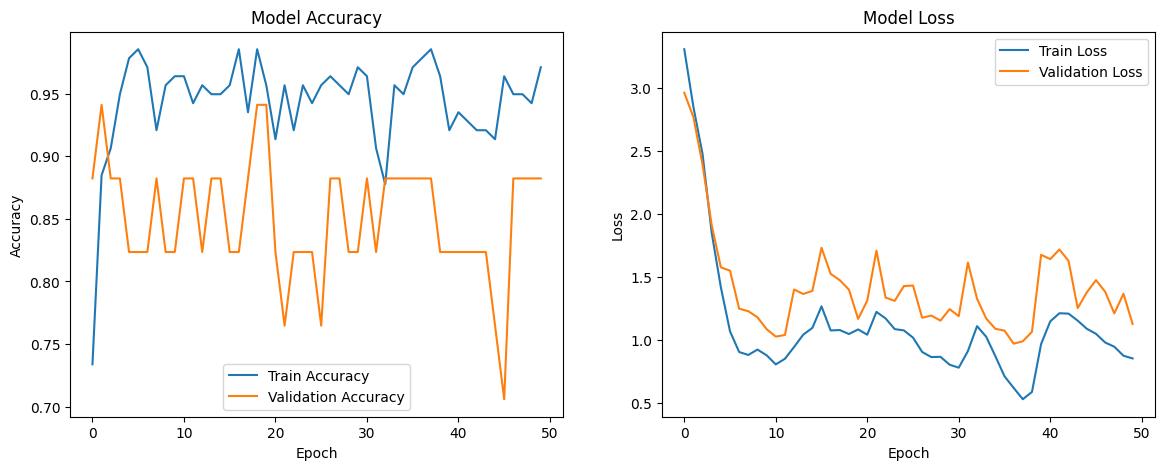

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Call the function with your training history
plot_training_history(history)


1/1 [==============================] - 0s 65ms/step


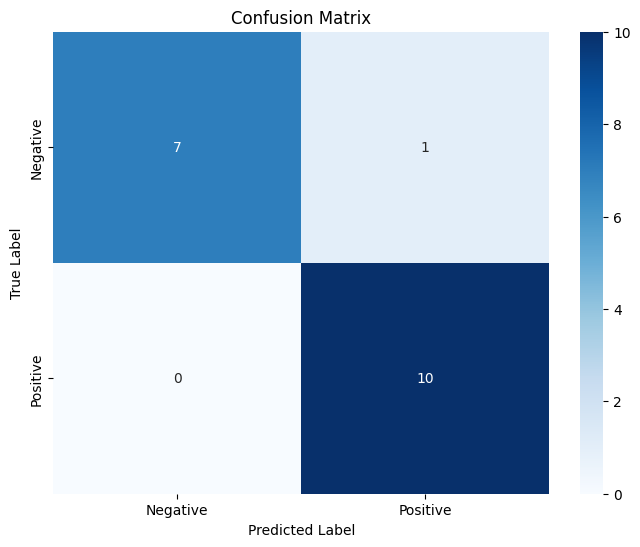

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Predicting test data
y_pred = final_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

plot_confusion_matrix(y_test, y_pred)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       1.00      0.88      0.93         8
    Positive       0.91      1.00      0.95        10

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



Improve noise in the val accuracy

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random as python_random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Load and preprocess data
data = pd.read_csv('data.csv')
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
X = data.drop(columns=['ID', 'class'])
y = data['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
final_model = Sequential([
    Dense(128, input_dim=450, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Compile the model
final_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with callbacks
history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=10,
    validation_data=(X_val, y_val),
    callbacks=[lr_schedule, early_stopping]
)

# Evaluate the model on the test set
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2%}')


Epoch 1/50
14/14 [==============================] - 3s 53ms/step - loss: 3.3089 - accuracy: 0.7338 - val_loss: 2.9634 - val_accuracy: 0.8824 - lr: 0.0100
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 2.8507 - accuracy: 0.8849 - val_loss: 2.7699 - val_accuracy: 0.9412 - lr: 0.0100
Epoch 3/50
14/14 [==============================] - 0s 13ms/step - loss: 2.4756 - accuracy: 0.9065 - val_loss: 2.3919 - val_accuracy: 0.8824 - lr: 0.0100
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 1.8505 - accuracy: 0.9496 - val_loss: 1.9102 - val_accuracy: 0.8824 - lr: 0.0100
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 1.4185 - accuracy: 0.9784 - val_loss: 1.5773 - val_accuracy: 0.8235 - lr: 0.0100
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 1.0690 - accuracy: 0.9856 - val_loss: 1.5504 - val_accuracy: 0.8235 - lr: 0.0100
Epoch 7/50
14/14 [==============================] - 0s 14ms/step - loss: 0.904

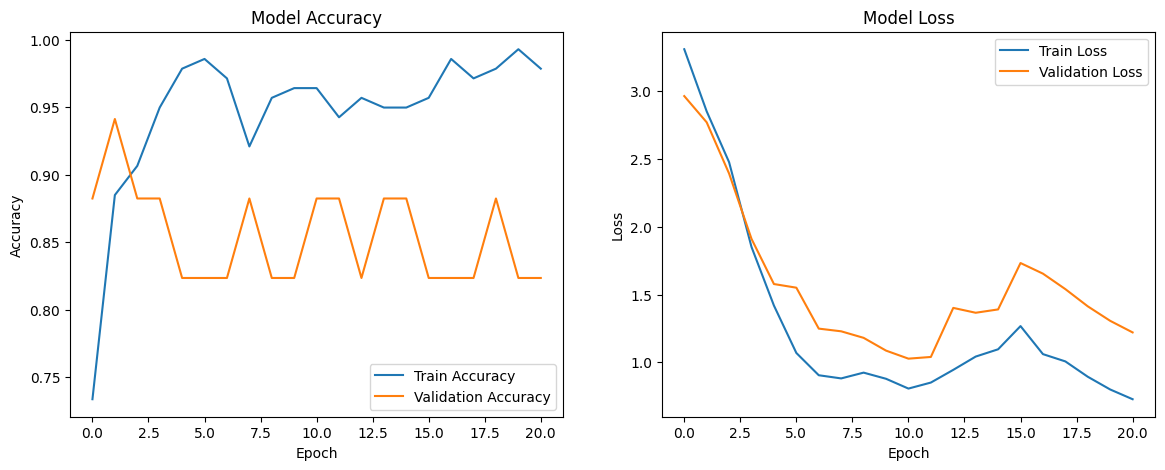

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Call the function with your training history
plot_training_history(history)


Noise is better, training still overfit

1/1 [==============================] - 0s 66ms/step


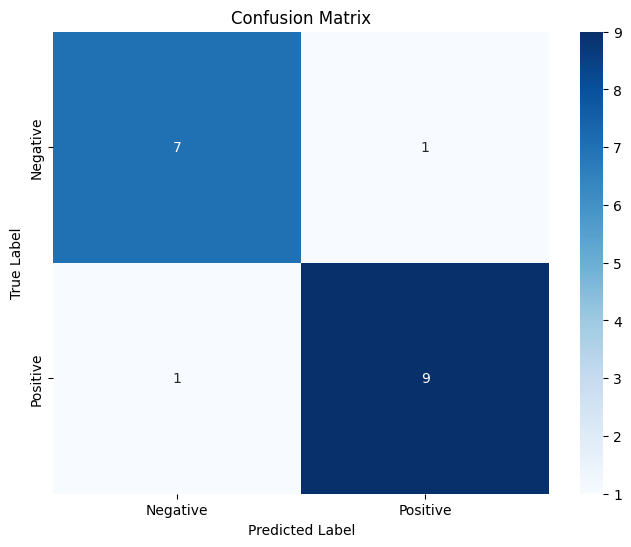

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Predicting test data
y_pred = final_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

plot_confusion_matrix(y_test, y_pred)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88         8
    Positive       0.90      0.90      0.90        10

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18

